# PROJET 4 : Segmentation des clients d'un site e-commerce


## SOMMAIRE  <a class="anchor" id="sommaire"></a>
## [IMPORT DES LIBRAIRIES](#3)<a class="anchor" id="sommaire"></a>
## [CHARGEMENT DES DONNEES](#4)<a class="anchor" id="sommaire"></a>
## [MISSION 1: DIFFERENTS TYPES DE SEGMENTATION ](#5)<a class="anchor" id="sommaire"></a>
### [M1-1 : RFM](#6)<a class="anchor" id="sommaire"></a>
### [M1-2 : K-MEANS](#7)<a class="anchor" id="sommaire"></a>
### [M1-3 : DB-SCAN](#8)<a class="anchor" id="sommaire"></a>


--------------------------------------------------------

## [IMPORT DES LIBRAIRIES](#sommaire)<a class="anchor" id="3"></a>

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from utils.functions import *
import os
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_samples, silhouette_score

## [CHARGEMENT DES DONNEES](#sommaire)<a class="anchor" id="4"></a>

In [16]:
### Lecture du fichier de sauvegarde de DF final
file_customers_Final_Behaviour = 'data/final/customers_Final_Behaviour.csv'
file_AllData = 'data/final/AllData.csv'

customers_Final_Behaviour = pd.read_csv(file_customers_Final_Behaviour, sep='\t', engine='python')
all_Data = pd.read_csv(file_AllData, sep='\t', engine='python')

## [MISSION 1: DIFFERENTS TYPES DE SEGMENTATION ](#sommaire)<a class="anchor" id="5"></a>

### [M1-1 : RFM ](#sommaire)<a class="anchor" id="6"></a>

### [M1-2 : K-Means ](#sommaire)<a class="anchor" id="7"></a>

### [M1-3 : DB-Scan ](#sommaire)<a class="anchor" id="8"></a>

In [18]:
customers_Final_Behaviour_dbscan = customers_Final_Behaviour.copy()
customers_Final_Behaviour_dbscan_in = customers_Final_Behaviour_dbscan.drop(columns=['Unnamed: 0','customer_id', 'customer_unique_id','customer_city','customer_state','order_id'])
customers_Final_Behaviour_dbscan_in.fillna(0, inplace = True)

#### Standardisation des variables :

In [19]:
customers_Final_Behaviour_dbscan_std = customers_Final_Behaviour_dbscan_in.sample(20000).copy()
# transformer les données en array numpy
X = customers_Final_Behaviour_dbscan_std.values

std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [26]:
customers_Final_Behaviour_dbscan_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94862 entries, 0 to 94861
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   recency_order             94862 non-null  int64  
 1   frequency_order           94862 non-null  float64
 2   monetary_amount_order     94862 non-null  float64
 3   duration_frequence_order  94862 non-null  int64  
 4   mean_value_order          94862 non-null  float64
 5   review_score_order        94862 non-null  float64
 6   mean_number_photos        94862 non-null  int64  
 7   nbr_payments_type         94862 non-null  float64
 8   amount_sports_leisure     94862 non-null  float64
 9   amount_health_beauty      94862 non-null  float64
 10  amount_home               94862 non-null  float64
 11  amount_furniture          94862 non-null  float64
 12  amount_fashion            94862 non-null  float64
 13  amount_misc               94862 non-null  float64
 14  amount

#### Calcul des parametres(eps,mn_samples) pour dbscan :

In [27]:
# calcul de la valeur optimale de epsilon
from sklearn.metrics import silhouette_samples, silhouette_score
nbColumns = 19
min_samples_default =nbColumns * 2

range_eps = [2,4,5]
for i in range_eps :
    print('eps ='+str(i))
    db = DBSCAN(eps = i, min_samples = min_samples_default).fit(X_scaled)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_]= True
    labels = db.labels_
    print(set(labels))
    silhouette_avg = silhouette_score(X_scaled, labels)
    print("pour eps ="+str(i),labels," le silhouette_score moyen est : ",silhouette_avg)
    


eps =2
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, -1}
pour eps =2 [0 0 1 ... 1 0 3]  le silhouette_score moyen est :  0.2551000781336188
eps =4
{0, 1, 2, 3, -1}
pour eps =4 [0 0 0 ... 0 0 0]  le silhouette_score moyen est :  0.3260525412200516
eps =5
{0, 1, 2, -1}
pour eps =5 [0 0 0 ... 0 0 0]  le silhouette_score moyen est :  0.39963324988451604


In [29]:
# calcul de la valeur min_sample
min_samples = [5,10,20,40]
for j in min_samples :
    print('min_samples ='+str(j))
    db = DBSCAN(eps = 5, min_samples = j).fit(X_scaled)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_]= True
    labels = set([label for label in db.labels_ if label >= 0]) # ignorer le label -1 comme un outlier
    print(set(labels))
    print("Pour min_samples ="+str(i),labels," le nombre total de clusters est : ",str(len(set(labels))))

min_samples =5
{0, 1, 2, 3, 4, 5}
Pour min_samples =5 {0, 1, 2, 3, 4, 5}  le nombre total de clusters est :  6
min_samples =10
{0, 1, 2, 3, 4}
Pour min_samples =5 {0, 1, 2, 3, 4}  le nombre total de clusters est :  5
min_samples =20
{0, 1, 2, 3}
Pour min_samples =5 {0, 1, 2, 3}  le nombre total de clusters est :  4
min_samples =40
{0, 1, 2}
Pour min_samples =5 {0, 1, 2}  le nombre total de clusters est :  3


In [30]:
# Numpy array of all the cluster labels assigned to each data point 
dbscan = DBSCAN(eps = 5, min_samples = 38).fit(X_scaled) 
clusters = dbscan.labels_ 
np.unique(clusters)

array([-1,  0,  1,  2], dtype=int64)

Text(0.5, 1.0, 'DBSCAN')

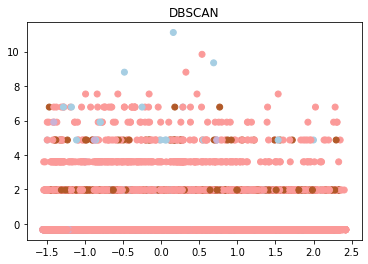

In [31]:
customers_Final_Behaviour_dbscan_std['dbscan_cluster'] = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0], X_scaled[:,1],c=dbscan.fit_predict(X_scaled), cmap='Paired')
plt.title("DBSCAN")

In [32]:
# Faire une transformation inverse de la normalisation faite Log :
customers_Final_Behaviour_dbscan_inverse = customers_Final_Behaviour_dbscan_std.copy()

customers_Final_Behaviour_dbscan_inverse_copy = customers_Final_Behaviour_dbscan_inverse.copy()
listVarDensite = ['frequency_order', 'monetary_amount_order','mean_value_order','nbr_payments_type',
       'amount_sports_leisure', 'amount_health_beauty', 'amount_home',
       'amount_furniture', 'amount_fashion', 'amount_misc',
       'amount_construction', 'amount_electronics', 'amount_supplies',
       'amount_food_drink', 'amount_gifts']
for j,val in enumerate(listVarDensite):
    # transformer les données pour le rendre normales  
    #Les variables qui ont un coeeficient de skewness > 2
    customers_Final_Behaviour_dbscan_inverse_copy[val] =  np.exp(customers_Final_Behaviour_dbscan_inverse[val])-1  
    jmax = j
    
#customers_Final_Behaviour_dbscan_inverse_copy.sort_values(by="dbscan_cluster", ascending=False)

,recency_order,frequency_order,monetary_amount_order,duration_frequence_order,mean_value_order,review_score_order,mean_number_photos,nbr_payments_type,amount_sports_leisure,amount_health_beauty,amount_home,amount_furniture,amount_fashion,amount_misc,amount_construction,amount_electronics,amount_supplies,amount_food_drink,amount_gifts,dbscan_cluster
37238,25,2.0,205.18,0,102.59,5.0,3,2.0,0.0,0.00,0.0,205.18,0.00,0.0,0.0,0.00,0.0,0.0,0.00,2
88668,160,2.0,835.68,5,417.84,5.0,3,2.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,835.68,0.0,0.0,0.00,2
79494,362,2.0,142.28,12,71.14,5.0,1,2.0,0.0,142.28,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,2
93056,407,2.0,81.70,13,40.85,5.0,3,2.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,81.70,2
31407,202,2.0,130.18,6,65.09,5.0,3,2.0,0.0,130.18,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65723,422,2.0,357.80,14,178.90,5.0,17,1.0,0.0,0.00,0.0,0.00,0.00,357.8,0.0,0.00,0.0,0.0,0.00,-1
64630,339,10.0,7886.00,11,788.60,5.0,2,2.0,0.0,7886.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,-1
77636,452,2.0,128.20,15,64.10,5.0,7,2.0,0.0,0.00,0.0,0.00,128.20,0.0,0.0,0.00,0.0,0.0,0.00,-1
60101,345,4.0,1016.36,11,254.09,1.0,4,2.0,0.0,0.00,0.0,508.18,0.00,0.0,0.0,0.00,0.0,0.0,508.18,-1


In [34]:
# Affichage des repartitions des variables pour chaque cluster :
#radar_plot(customers_Final_Behaviour_dbscan_inverse_copy, group='dbscan_cluster', xsize=0.25, ysize=0.25, figsize=(25,25))

#### Réduction des dimensions pour afficher les clusters :

In [12]:
# TSNE est une technique utile pour visualiser des données avec beaucoup de variables. 
# L'algorithme t-SNE est intéressant car il utilise des distributions de probabilité conjointes pour décrire la proximité des points de données.

In [35]:
np.random.seed(1)
#tnse_sample = X_scaled
tnse_sample = customers_Final_Behaviour_dbscan_std

In [36]:
import sklearn.manifold as manifold

# On applique le T-SNE à l'échantillon
tsne = manifold.TSNE(n_components=2, init='pca', perplexity=50, random_state=0)
X_tsne = tsne.fit_transform(tnse_sample)

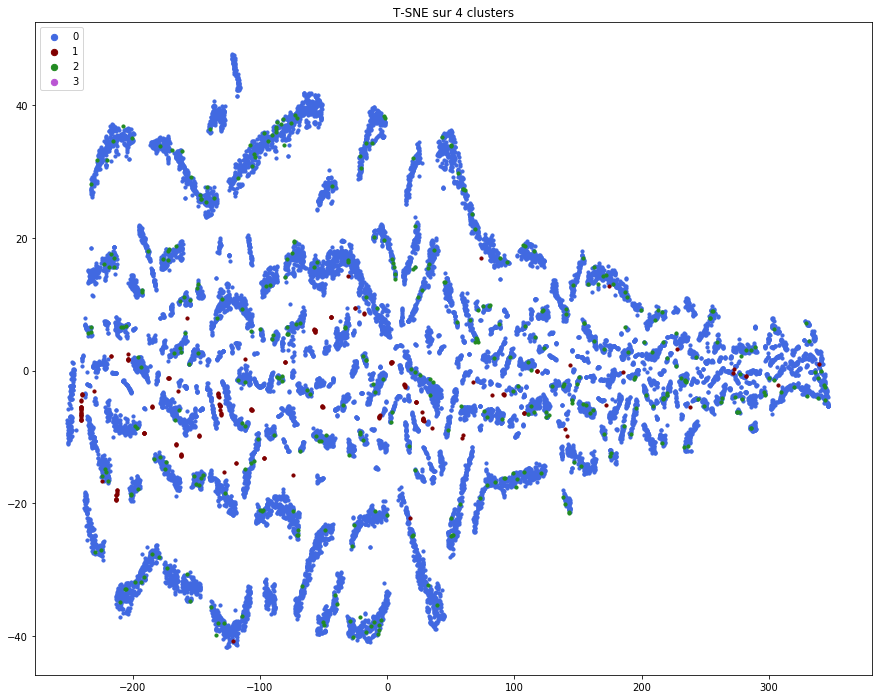

In [38]:
# Affichage du graphique
clusters_sample = dbscan.fit_predict(X_scaled)
plt.figure(figsize=(15, 12))
plt.axis([np.min(X_tsne[:, 0] * 1.1), np.max(X_tsne[:, 0] * 1.1),
          np.min(X_tsne[:, 1] * 1.1), np.max(X_tsne[:, 1] * 1.1)])

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy','gray','purple']

for i in range(len(np.unique(clusters_sample))):
    idx = clusters_sample == i
    plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], label=i, s=10, c=colors[i])
    plt.title('T-SNE sur 4 clusters')

plt.legend(loc='upper left', markerscale=2)
plt.show()